### SENTIMENT ANALYSIS ON MOVIEW REVIEW

#### Importing Libraries

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud
import re
import string

#### Loading IMDB dataset

In [115]:
num_words = 5000  # only keep the top 20000 , most frequently occuring words

In [116]:
(X_test, Y_test) , (X_train, Y_train) =  imdb.load_data(num_words = num_words)  

In [117]:
# Get the word index
word_index = imdb.get_word_index()

In [118]:
# Reverse word index to get words from indices
reverse_word_index = {value: key for (key, value) in word_index.items()}

In [119]:
# Decode reviews back to text
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i-3, '?') for i in encoded_review])

In [120]:
# Convert to text data
train_text = [decode_review(review) for review in X_train]
test_text = [decode_review(review) for review in X_test]

#### Text Preprocessing

In [122]:
def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r"<.*?>", "", text)  
    text = text.translate(str.maketrans('', '', string.punctuation))  
    text = re.sub(r"\d+", "", text)  
    text = re.sub(r"\s+", " ", text).strip()  
    return text

train_text_clean = [preprocess_text(review) for review in train_text]
test_text_clean = [preprocess_text(review) for review in test_text]

#### TF-IDF Vectorization

In [124]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(train_text_clean)
X_test_tfidf = tfidf.transform(test_text_clean)

#### Feature Extraction & Analysis

##### Top TF-IDF Words

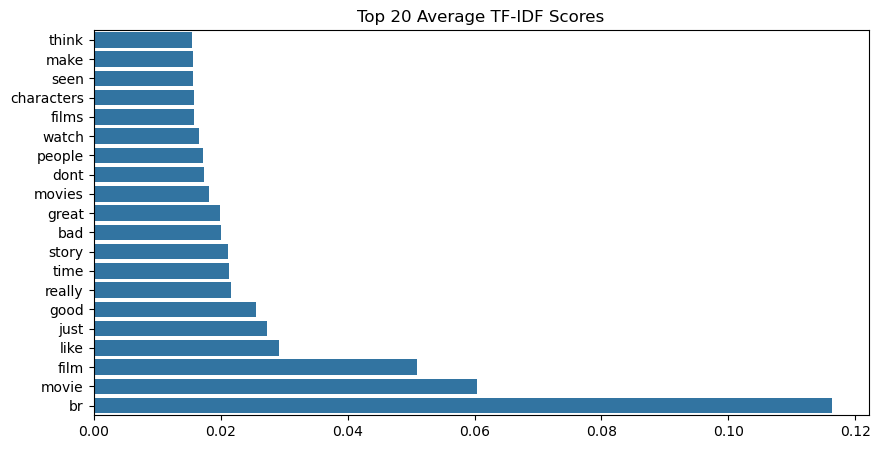

In [127]:
feature_names = np.array(tfidf.get_feature_names_out())
top_n = 20
tfidf_means = np.asarray(X_train_tfidf.mean(axis=0)).ravel()
top_features_idx = np.argsort(tfidf_means)[-top_n:]

# Visualizing top words
plt.figure(figsize=(10,5))
sns.barplot(x=tfidf_means[top_features_idx], y=feature_names[top_features_idx])
plt.title("Top 20 Average TF-IDF Scores")
plt.show()

##### WordCloud for Positive and Negative Reviews

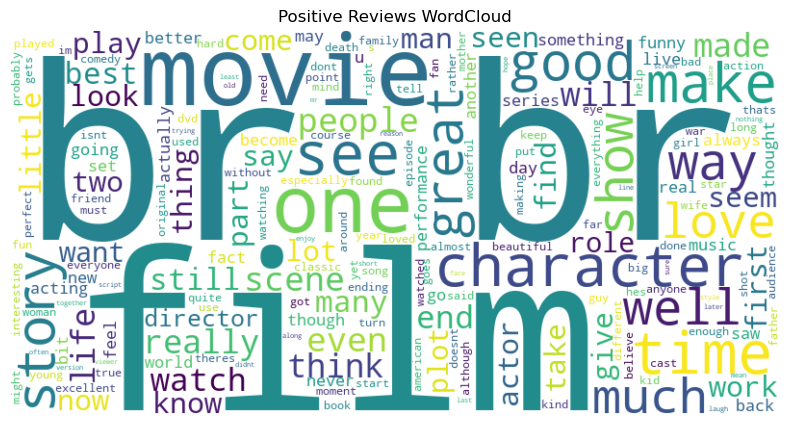

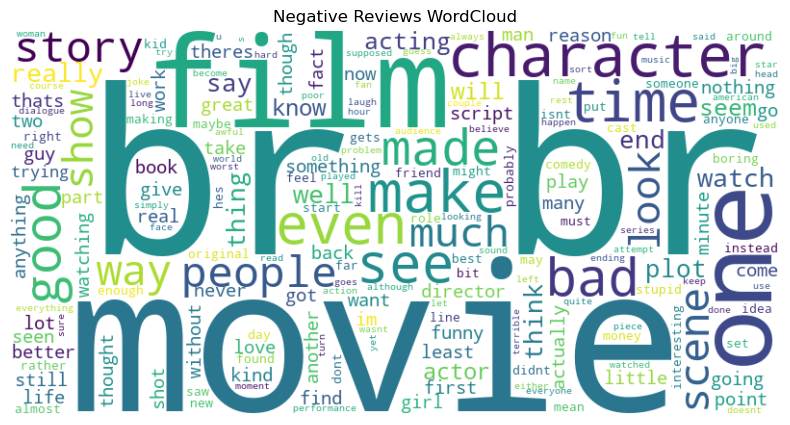

In [129]:
positive_reviews = ' '.join([train_text_clean[i] for i in range(len(y_train)) if y_train[i] == 1])
negative_reviews = ' '.join([train_text_clean[i] for i in range(len(y_train)) if y_train[i] == 0])

# WordCloud Positive
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews WordCloud")
plt.show()

# WordCloud Negative
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews WordCloud")
plt.show()

##### AI Algorithm: SVM

In [131]:
model = LinearSVC()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

C:\Users\siddd\AIML\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


#### Model Evaluation 

Accuracy Score: 0.85796

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86     12500
           1       0.87      0.85      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



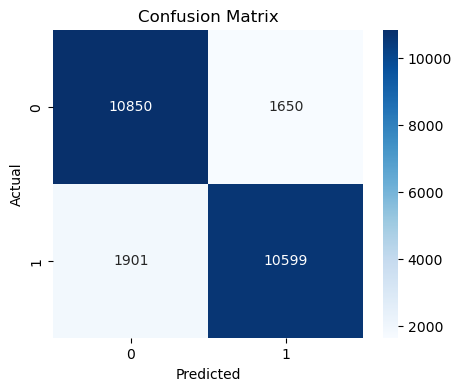

In [133]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(" Movie Review Sentiment Analyzer ")
print("Type a movie review to see if it's Positive or Negative.")
print("Type 'exit' to end the program.\n")

while True:
    user_text = input("Enter your movie review: ")

    if user_text.lower().strip() == "exit":
        print("Exiting... Thank you for using the analyzer!")
        break

    # Basic preprocessing
    def clean_text(text):
        text = text.lower()
        text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
        text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = text.strip()
        return text

    cleaned_text = clean_text(user_text)

    if len(cleaned_text.split()) < 3:
        print("Please enter a more detailed review for accurate sentiment prediction.\n")
        continue

    # Vectorize and predict
    text_vector = tfidf.transform([cleaned_text])
    prediction = model.predict(text_vector)[0]

    sentiment = "Positive!" if prediction == 1 else "Negative!"
    print(f" Predicted Sentiment: {sentiment}\n")


 Movie Review Sentiment Analyzer 
Type a movie review to see if it's Positive or Negative.
Type 'exit' to end the program.



Enter your movie review:  Hangover is entertaining movie!


 Predicted Sentiment: Positive!



Enter your movie review:  Dhoom is worst movie


 Predicted Sentiment: Negative!



Enter your movie review:  Phir se phera pehri is ok movie


 Predicted Sentiment: Negative!

